Pekerjaan Muhammad Ulil 'Azmi

In [1]:
# Mengimpor library-library yang digunakan
import numpy as np # untuk aljabar linear
import pandas as pd # pemrosesan data, pembacaan file CSV I/O (contoh: pd.read_csv)
import matplotlib.pyplot as plt # untuk visualisasi
import datetime # untuk data atau pengolahan data berupa tanggal dan waktu

In [2]:
import tensorflow as tf # Mengimpor library tensor flow

In [3]:
# Mengimpor library untuk perhitungan
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Menyesuaikan path dengan lokasi dataset yang digunakan
dataset=pd.read_csv('/content/drive/MyDrive/Proa-ML/Demo/Dataset/Sample - Superstore.csv', encoding='windows-1252')

In [6]:
#Melihat informai dari dataset yang kita miliki
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
dataset.head() # Melihat bagian kepala (5 data paling atas dari dataset kita)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
dataset.Category.unique() # Melihat anggota unik dari kolom "Category"

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [9]:
dataset["Ship Mode"].unique() # Melihat anggota unik dari kolom "Ship Mode"

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [10]:
dataset["Segment"].unique() # Melihat anggota unik dari kolom "Segment"

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
dataset["Region"].unique() # Melihat anggota unik dari kolom "Region"

array(['South', 'West', 'Central', 'East'], dtype=object)

In [12]:
dataset.shape # Melihat bentuk dari dataset

(9994, 21)

In [13]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], format='%m/%d/%Y') #Mengonversi tipe data dari kolom 'Order Date' atau tanggal pemesanan menjadi format tanggal.
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'], format='%m/%d/%Y') #Mengonversi tipe data dari kolom 'Ship Date' atau tanggal pengiriman menjadi format tanggal.
dataset.info() # Melihat informasi dataset setelah konversi type data dari kolom tanggal menjadi bertipe format tanggal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [14]:
dataset['Order Date'].min(), dataset['Order Date'].max() # Melihat jangka waktu dari dataset yang dimiliki

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [15]:
west_region = dataset.loc[dataset['Region'] == 'West']

In [16]:
dataset_profit = west_region

In [17]:
dataset_profit = dataset_profit[['Order Date','Profit']]

In [18]:
dataset_profit.head()


,Order Date,Profit
2,2016-06-12,6.8714
5,2014-06-09,14.1694
6,2014-06-09,1.9656
7,2014-06-09,90.7152
8,2014-06-09,5.7825


In [19]:
dataset_profit = dataset_profit.sort_values('Order Date')
dataset_profit = dataset_profit.groupby('Order Date')['Profit'].sum().reset_index()
dataset_profit.head()


,Order Date,Profit
0,2014-01-06,9.3312
1,2014-01-13,249.1494
2,2014-01-18,6.4864
3,2014-01-19,-287.9976
4,2014-01-20,15.0828


In [20]:
dataset_profit = dataset_profit.set_index('Order Date')
dataset_profit.head()


,Profit
Order Date,
2014-01-06,9.3312
2014-01-13,249.1494
2014-01-18,6.4864
2014-01-19,-287.9976
2014-01-20,15.0828


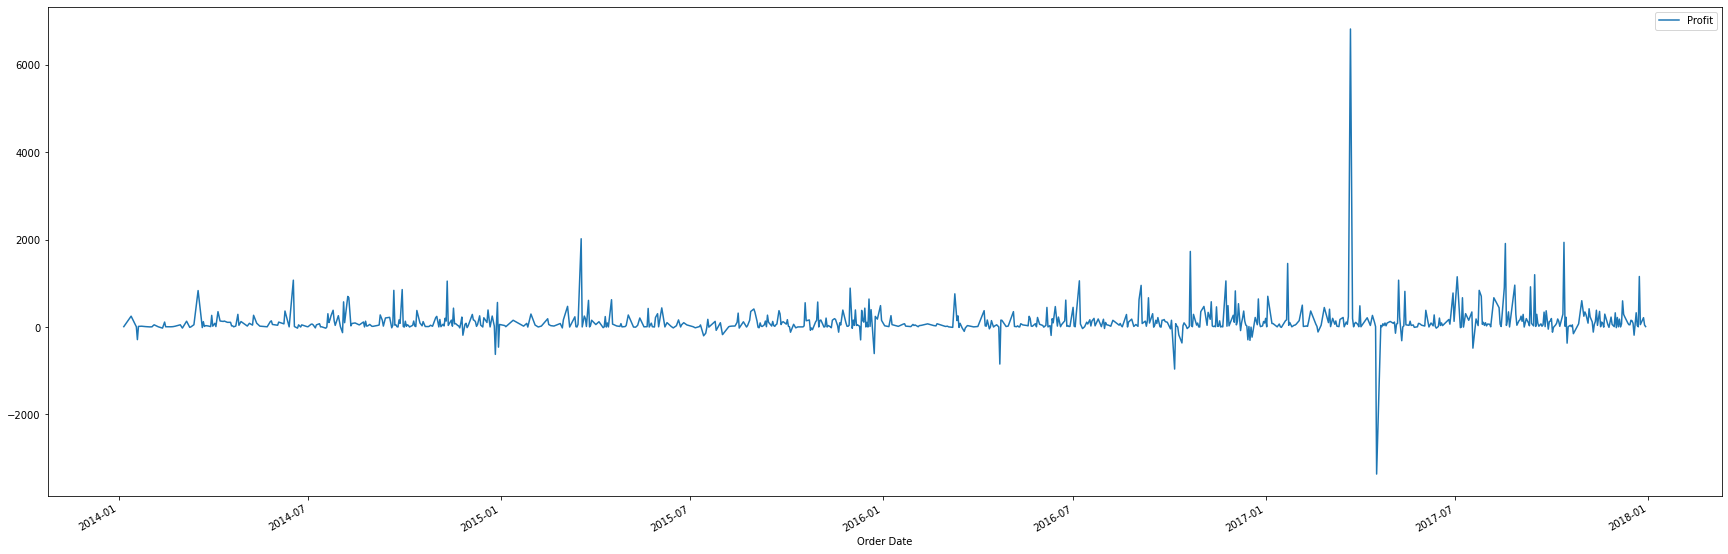

In [21]:
dataset_profit.plot(figsize=(30, 10));

In [22]:
dataset_profit =  pd.DataFrame(dataset_profit['Profit'].resample('D').mean()) #Data diresample dengan aturan D alias hari
dataset_profit = dataset_profit.interpolate(method='linear') #Fungsi interpolate() digunakan untuk melakukan interpolasi secara linear.

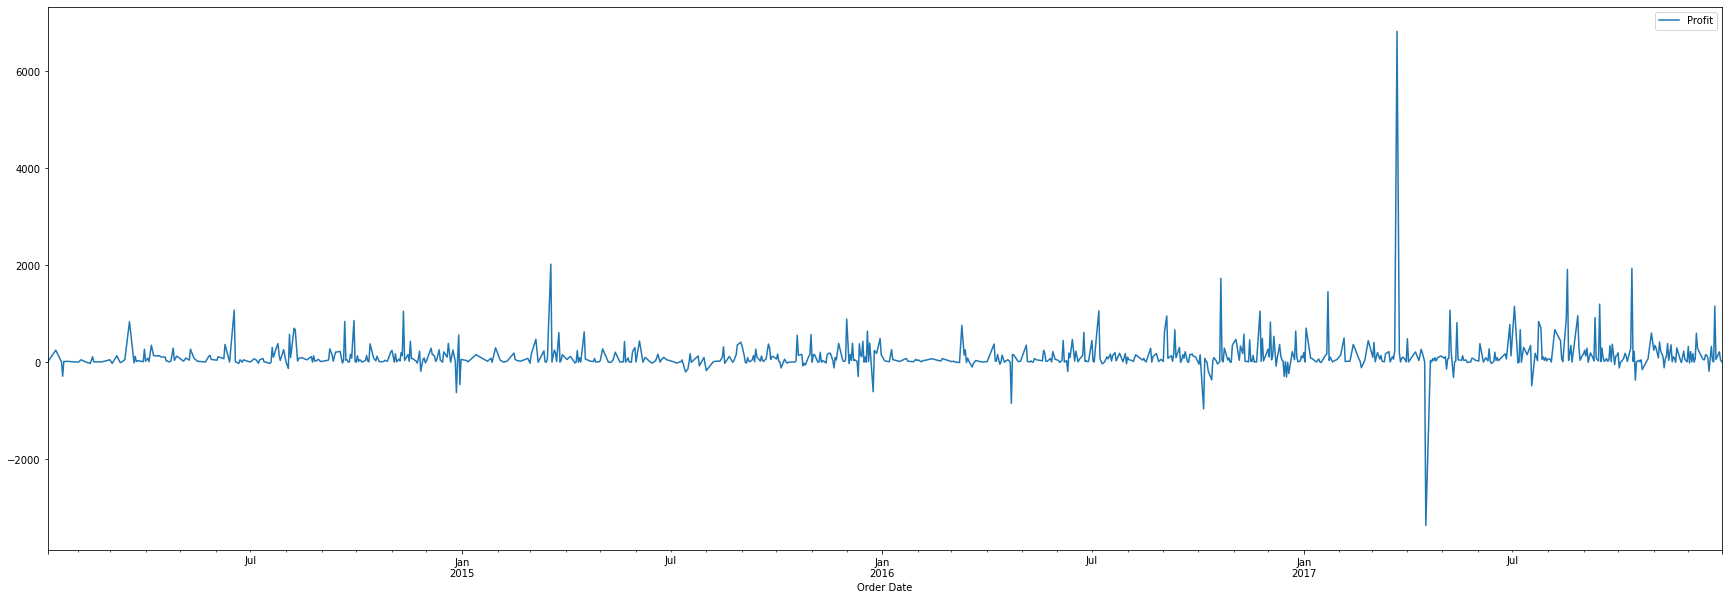

In [23]:
dataset_profit.plot(figsize=(30, 10));

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


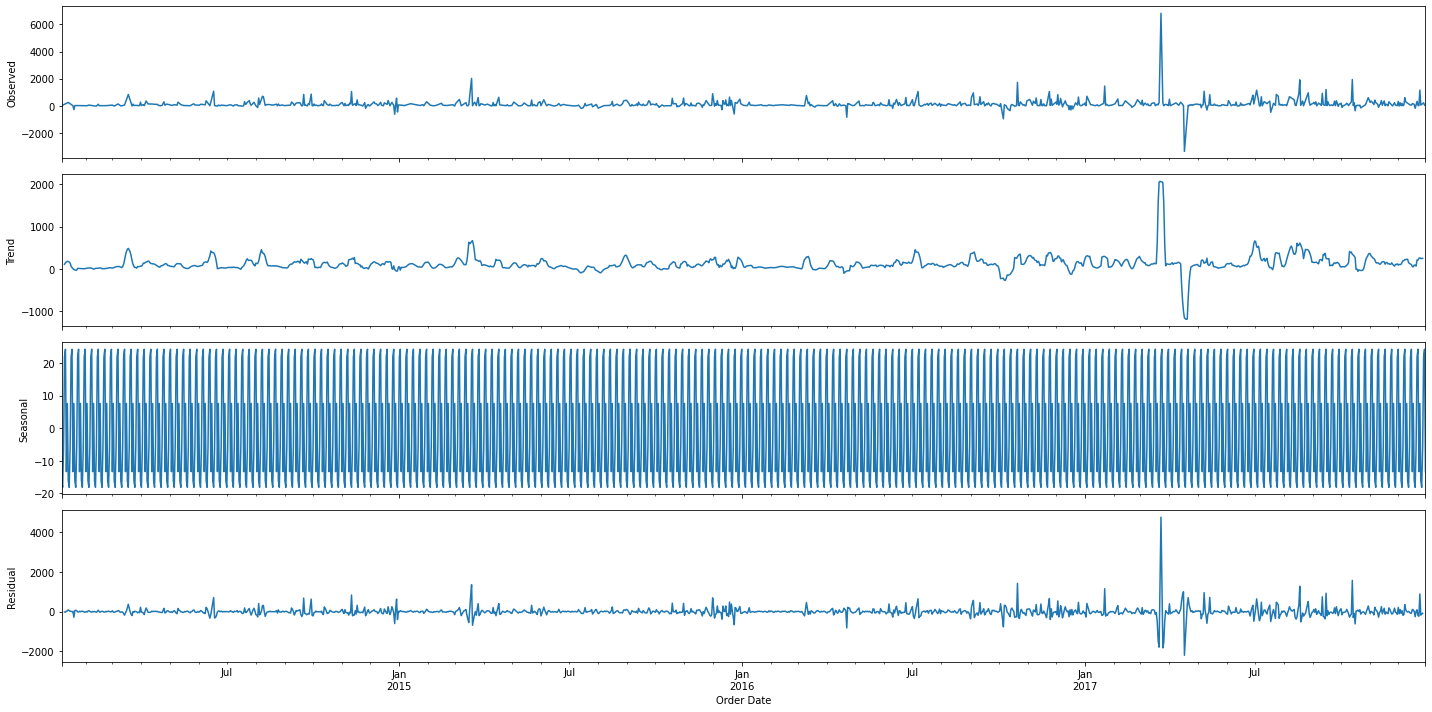

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(dataset_profit, model='additive') # Mengurai data deret waktu menjadi Tren dan Seasonalitas
fig = decomposition.plot()
plt.show();

In [25]:
order_dates = dataset_profit.index.values
profit  = dataset_profit['Profit'].values

In [26]:
profit.shape

(1455,)

In [27]:
# Membagi bagian training dan validasi sebesar 0.8 dan 0.2
profit_train = profit[:int(len(profit)*0.8)]
profit_valid = profit[int(len(profit)*0.8):]

In [28]:
profit_train_time = order_dates[:int(len(profit)*0.8)]
profit_valid_time = order_dates[int(len(profit)*0.8):]

Model Pertama Dengan Tensor Flow

In [29]:
# Callback early stopping dengan monitor mean absolute error untuk validasi
callback_es = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae',
    min_delta=0,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [30]:
# Memotong atau menjendela dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [31]:
window_size = 16
batch_size=64
shuffle_buffer=1000

In [32]:
# Membuat set pelatihan dan validasi
train_set = windowed_dataset(profit_train, window_size, batch_size, shuffle_buffer)
valid_set = windowed_dataset(profit_valid, window_size, batch_size, shuffle_buffer)

In [33]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 64)          384       
                                                                 
 lstm (LSTM)                 (None, None, 64)          33024     
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          33024     
                                                                 
 dense (Dense)               (None, None, 32)          2080      
                                                                 
 dense_1 (Dense)             (None, None, 16)          528       
                                                                 
 dense_2 (Dense)             (None, None, 8)           136       
                                                                 
 dense_3 (Dense)             (None, None, 4)           3

In [34]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [35]:
history = model.fit(train_set,epochs=100, validation_data = valid_set, callbacks=callback_es)

Epoch 1/100
18/18 [==============================] - 6s 114ms/step - loss: 107.1458 - mae: 107.6441 - val_loss: 221.5537 - val_mae: 222.0521
Epoch 2/100
18/18 [==============================] - 1s 34ms/step - loss: 101.8493 - mae: 102.3477 - val_loss: 221.8475 - val_mae: 222.3470
Epoch 3/100
18/18 [==============================] - 1s 32ms/step - loss: 98.0237 - mae: 98.5214 - val_loss: 212.8826 - val_mae: 213.3814
Epoch 4/100
18/18 [==============================] - 1s 35ms/step - loss: 93.3381 - mae: 93.8357 - val_loss: 216.1601 - val_mae: 216.6582
Epoch 5/100
18/18 [==============================] - 1s 35ms/step - loss: 89.7884 - mae: 90.2848 - val_loss: 209.2457 - val_mae: 209.7447
Epoch 6/100
18/18 [==============================] - 1s 34ms/step - loss: 88.7989 - mae: 89.2957 - val_loss: 206.5842 - val_mae: 207.0833
Epoch 7/100
18/18 [==============================] - 1s 32ms/step - loss: 86.2877 - mae: 86.7841 - val_loss: 210.8671 - val_mae: 211.3654
Epoch 8/100
18/18 [==========

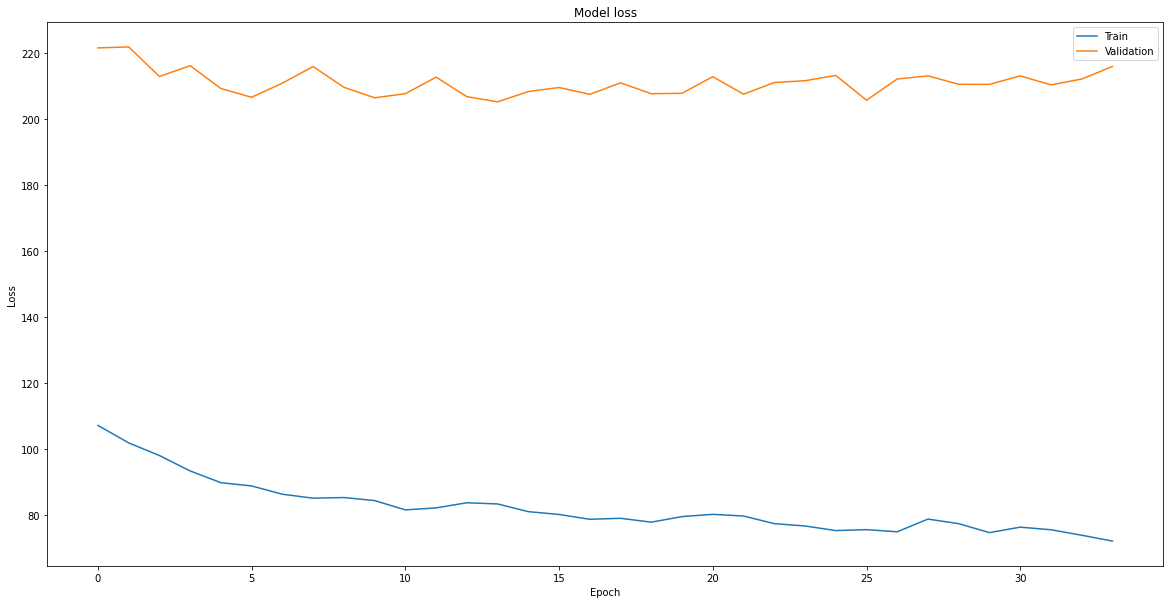

In [36]:
#Membuat plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

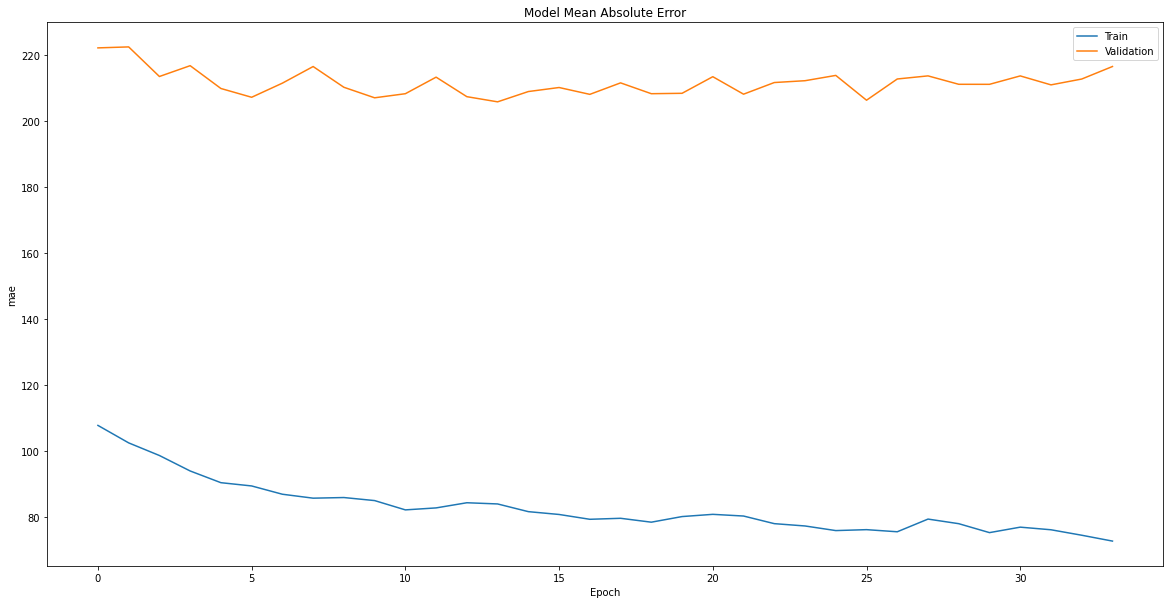

In [37]:
#Membuat plot MAE
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [38]:
# Membuat fungsi untuk memprediksi hasil
def model_predict(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(16).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [39]:
# Melakukan prediksi hasil
model_1_predict = model_predict(model, profit[..., np.newaxis], window_size)
model_1_predict = model_1_predict[int(len(profit)*0.8) - window_size: -1, -1, 0]

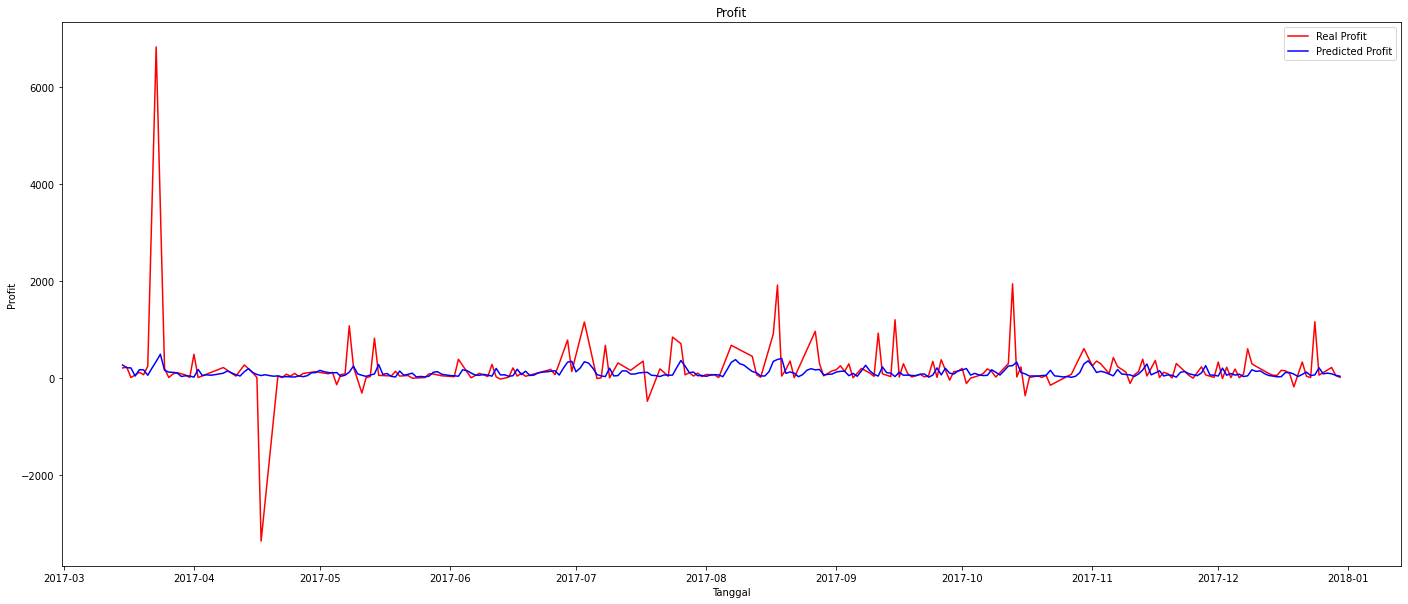

In [40]:
# Menampilkan perbandingan nilai validasi asli dan hasil prediksi
plt.figure(figsize=(24, 10))
plt.plot(profit_valid_time, profit_valid, color = 'red', label = 'Real Profit')
plt.plot(profit_valid_time, model_1_predict, color = 'blue', label = 'Predicted Profit')
plt.title('Profit')
plt.xlabel('Tanggal')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [41]:
mse_model_1 = mean_squared_error(model_1_predict, profit_valid)
rmse_model_1 = sqrt(mse_model_1)
print('RMSE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(rmse_model_1, 3))) # Menampilkan nilai akar mse sampai tiga desimal
mae_model_1 = mean_absolute_error(model_1_predict, profit_valid)
print('MAE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(mae_model_1, 3))) # Menampilkan nilai mae sampai tiga desimal

RMSE dari hasil prediksi di dalam jangka yang diketahui adalah 600.194
MAE dari hasil prediksi di dalam jangka yang diketahui adalah 222.319


In [42]:
# Melakukan prediksi hasil
model_1_predict_all = model_predict(model, profit[..., np.newaxis], window_size)
model_1_predict_all = model_1_predict_all[16 - window_size: -1, -1, 0]

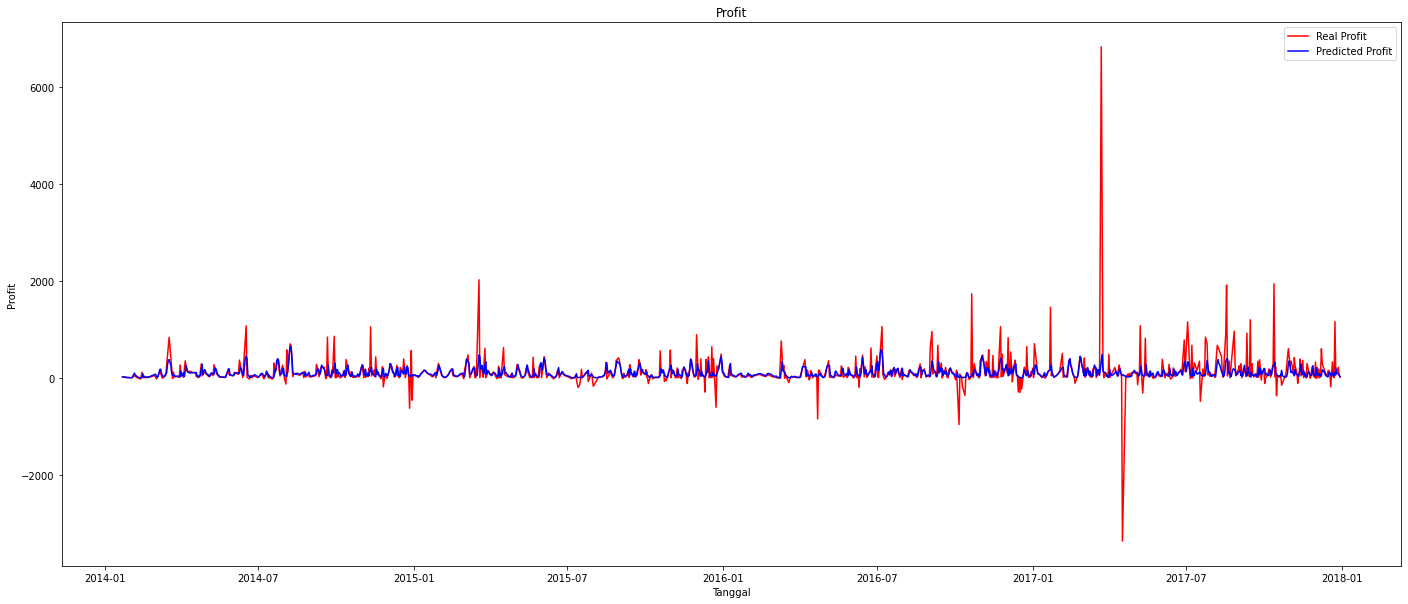

In [43]:
plt.figure(figsize=(24, 10))
plt.plot(order_dates[16:], profit[16:], color = 'red', label = 'Real Profit')
plt.plot(order_dates[16:], model_1_predict_all, color = 'blue', label = 'Predicted Profit')
plt.title('Profit')
plt.xlabel('Tanggal')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [44]:
mse_model_1_all = mean_squared_error(model_1_predict_all, profit[16:])
rmse_model_1_all = sqrt(mse_model_1_all)
print('RMSE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(rmse_model_1_all, 3))) # Menampilkan nilai akar mse sampai tiga desimal
mae_model_1_all = mean_absolute_error(model_1_predict_all, profit[16:])
print('MAE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(mae_model_1_all, 3))) # Menampilkan nilai mae sampai tiga desimal

RMSE dari hasil prediksi di dalam jangka yang diketahui adalah 307.219
MAE dari hasil prediksi di dalam jangka yang diketahui adalah 107.26


Model Kedua Dengan Tensor Flow

In [45]:
profit_train_2 = dataset_profit[:int(len(profit)*0.8)]
profit_valid_2 = dataset_profit[int(len(profit)*0.8):]

In [46]:
skala = MinMaxScaler(feature_range = (0, 1)) # Membuat skala dari nilai 0 sampai 1
training_set_scaled = skala.fit_transform(profit_train_2) # Mengubah nilai profit_train sehingga menjadi rentang dalam skala

In [47]:
# Membuat sebuah struktur data dengan 60 satuan waktu dan 1 output
X_train = []
y_train = []
for i in range(60, int(len(training_set_scaled))):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Membentuk ulang
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [48]:
validation_set_scaled = skala.fit_transform(profit_valid_2) # Mengubah nilai profit_valid sehingga menjadi rentang dalam skala

In [49]:
# Membuat sebuah struktur data dengan 60 satuan waktu dan 1 output
X_valid = []
y_valid = []
for i in range(60, len(validation_set_scaled)):
    X_valid.append(validation_set_scaled[i-60:i, 0])
    y_valid.append(validation_set_scaled[i, 0])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

# Reshaping
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

In [50]:
#Membuat model ke-2 yang digunakan

model_2 = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.LSTM(units = 64, return_sequences = True),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.LSTM(units = 64,return_sequences = True),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.LSTM(units = 64),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units = 1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)               

In [51]:
callback_es_2 = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [52]:
epoch = 100 
batch_size = 32

In [53]:
#Compile model ke 2 TF
model_2.compile(optimizer = 'adam',
               loss = tf.keras.losses.Huber(),
               metrics=["mae"])


In [54]:
history_2 = model_2.fit(X_train, y_train,
                     validation_data=(X_valid, y_valid),
                     epochs = epoch,
                     batch_size = batch_size,
                     callbacks=callback_es_2)

Epoch 1/100
35/35 [==============================] - 12s 177ms/step - loss: 2.4408 - mae: 2.8814 - val_loss: 0.1167 - val_mae: 0.4818
Epoch 2/100
35/35 [==============================] - 5s 131ms/step - loss: 0.2364 - mae: 0.5546 - val_loss: 0.0659 - val_mae: 0.3616
Epoch 3/100
35/35 [==============================] - 5s 131ms/step - loss: 0.1178 - mae: 0.3868 - val_loss: 0.0034 - val_mae: 0.0760
Epoch 4/100
35/35 [==============================] - 4s 127ms/step - loss: 0.0904 - mae: 0.3408 - val_loss: 0.0023 - val_mae: 0.0600
Epoch 5/100
35/35 [==============================] - 4s 129ms/step - loss: 0.0715 - mae: 0.3055 - val_loss: 0.0414 - val_mae: 0.2860
Epoch 6/100
35/35 [==============================] - 5s 155ms/step - loss: 0.0720 - mae: 0.3051 - val_loss: 5.5874e-04 - val_mae: 0.0273
Epoch 7/100
35/35 [==============================] - 5s 130ms/step - loss: 0.0577 - mae: 0.2665 - val_loss: 0.0426 - val_mae: 0.2903
Epoch 8/100
35/35 [==============================] - 5s 129ms/st

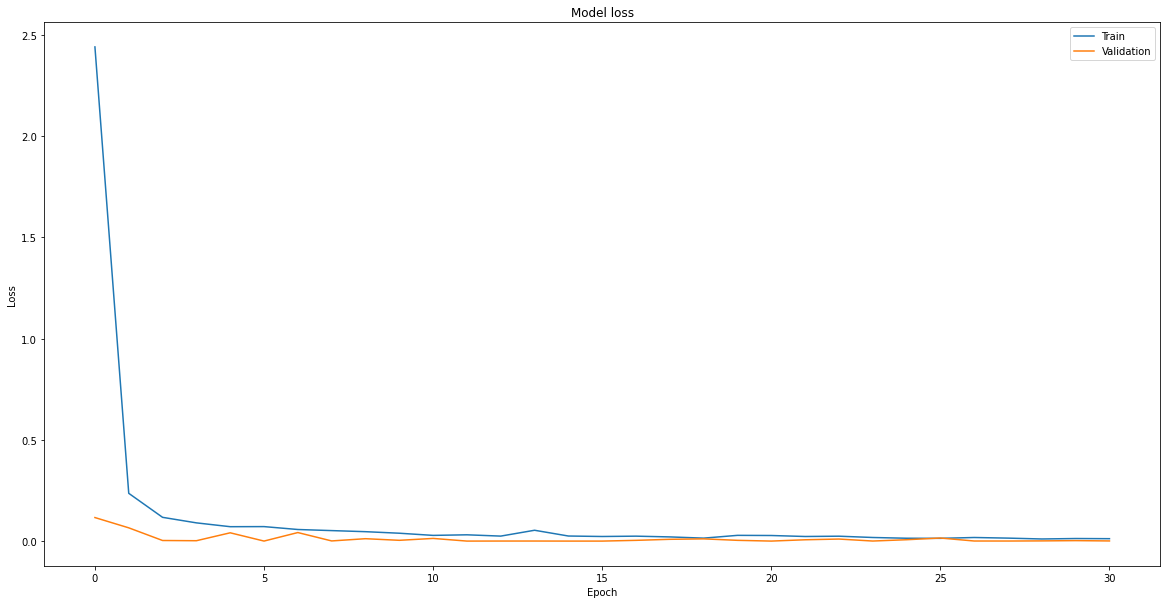

In [55]:
#Membuat plot loss kedua
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

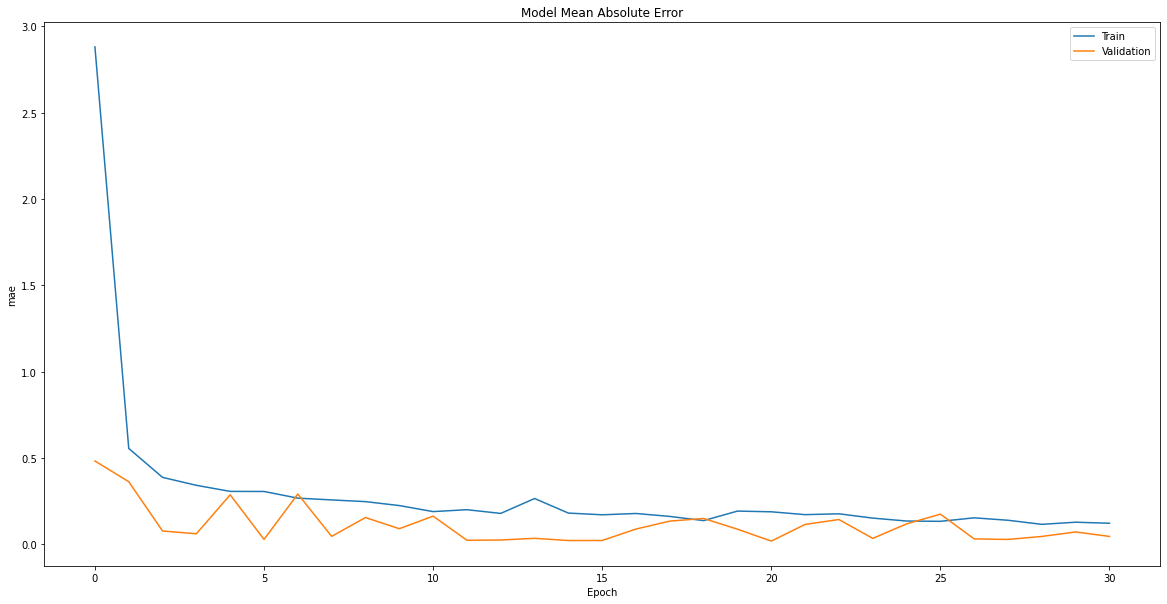

In [56]:
#Membuat plot MAE
plt.plot(history_2.history['mae'])
plt.plot(history_2.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [57]:
model_2_predict = model_2.predict(X_valid)
model_2_predict = skala.inverse_transform(model_2_predict)

In [58]:
profit_valid.shape #Melihat bentuk dari profit_valid

(291,)

In [59]:
model_2_predict.shape

(231, 1)

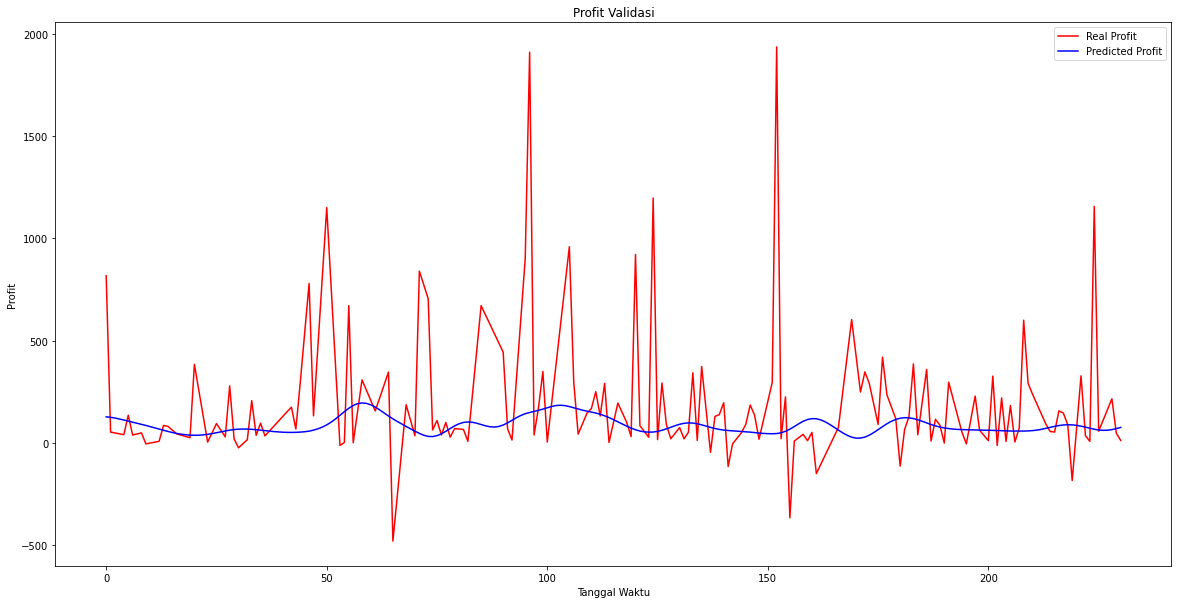

In [60]:
plt.plot(profit_valid[60:], color = 'red', label = 'Real Profit')
plt.plot(model_2_predict, color = 'blue', label = 'Predicted Profit')
plt.title('Profit Validasi')
plt.xlabel('Tanggal Waktu')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [61]:
mse_model_2 = mean_squared_error(model_2_predict, profit_valid[60:])
rmse_model_2 = sqrt(mse_model_2)
print('RMSE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(rmse_model_2, 3))) # Menampilkan nilai akar mse sampai tiga desimal
mae_model_2 = mean_absolute_error(model_2_predict, profit_valid[60:])
print('MAE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(mae_model_2, 3))) # Menampilkan nilai mae sampai tiga desimal

RMSE dari hasil prediksi di dalam jangka yang diketahui adalah 316.96
MAE dari hasil prediksi di dalam jangka yang diketahui adalah 179.181


In [62]:
full_set_scaled = skala.fit_transform(dataset_profit) # Mengubah nilai profit_valid sehingga menjadi rentang dalam skala
X_full = []
y_full = []
for i in range(60, len(full_set_scaled)):
    X_full.append(full_set_scaled[i-60:i, 0])
    y_full.append(full_set_scaled[i, 0])
X_full, y_full = np.array(X_full), np.array(y_full)

# Reshaping
X_full = np.reshape(X_full, (X_full.shape[0], X_full.shape[1], 1))

In [63]:
model_2_predict_full = model_2.predict(X_full)
model_2_predict_full = skala.inverse_transform(model_2_predict_full)

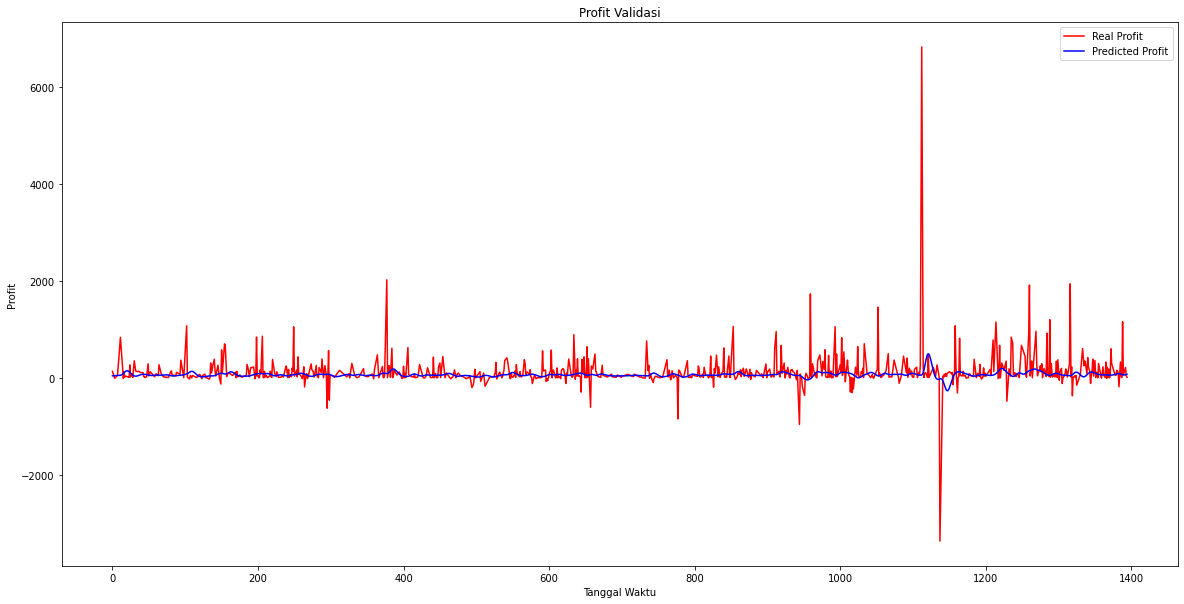

In [64]:
plt.plot(profit[60:], color = 'red', label = 'Real Profit')
plt.plot(model_2_predict_full, color = 'blue', label = 'Predicted Profit')
plt.title('Profit Validasi')
plt.xlabel('Tanggal Waktu')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [65]:
mse_model_2_full = mean_squared_error(model_2_predict_full, profit[60:])
rmse_model_2_full = sqrt(mse_model_2_full)
print('RMSE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(rmse_model_2_full, 3))) # Menampilkan nilai akar mse sampai tiga desimal
mae_model_2_full = mean_absolute_error(model_2_predict_full, profit[60:])
print('MAE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(mae_model_2_full, 3))) # Menampilkan nilai mae sampai tiga desimal

RMSE dari hasil prediksi di dalam jangka yang diketahui adalah 341.548
MAE dari hasil prediksi di dalam jangka yang diketahui adalah 140.486


Model Ketiga Dengan Seasonal ARIMA

In [66]:
#Menggunakan Seasonal Arima (SARIMA) untuk melakukan forecasting

In [67]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq_musiman = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for parameters in pdq: # looping untuk mengetahui kombinasi parameter musiman untuk SARIMA
    for parameter_musiman in pdq_musiman:
        try:
            mod = sm.tsa.statespace.SARIMAX(dataset_profit,
                                            order=parameters,
                                            seasonal_param_order=parameter_musiman,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #mengetahui nilai AIC dari model**
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, parameter_musiman, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:21183.219647804905
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:21183.219647804905
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:21183.219647804905
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:21183.219647804905
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:21183.219647804905
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:21183.219647804905
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:21183.219647804905
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:21183.219647804905
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:20644.053433183268
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:20644.053433183268
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:20644.053433183268
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:20644.053433183268
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:20644.053433183268
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:20644.053433183268
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:20644.053433183268
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:20644.053433183268
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:20825.921663064284
SARIMA(0, 1, 0)x(0, 0, 1, 12)12

In [68]:
# Diambil SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:26446.073210719085

In [69]:
model_sarima = sm.tsa.statespace.SARIMAX(dataset_profit,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
hasil = model_sarima.fit() #model fitting
print(hasil.summary().tables[1]) # menampilkan hasil model SARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5517      0.008     72.688      0.000       0.537       0.567
ma.L1         -1.0000      1.289     -0.776      0.438      -3.526       1.526
ar.S.L12      -0.0334      0.055     -0.612      0.540      -0.140       0.074
ma.S.L12      -0.9694      0.010    -96.805      0.000      -0.989      -0.950
sigma2       7.76e+04      1e+05      0.776      0.438   -1.18e+05    2.73e+05


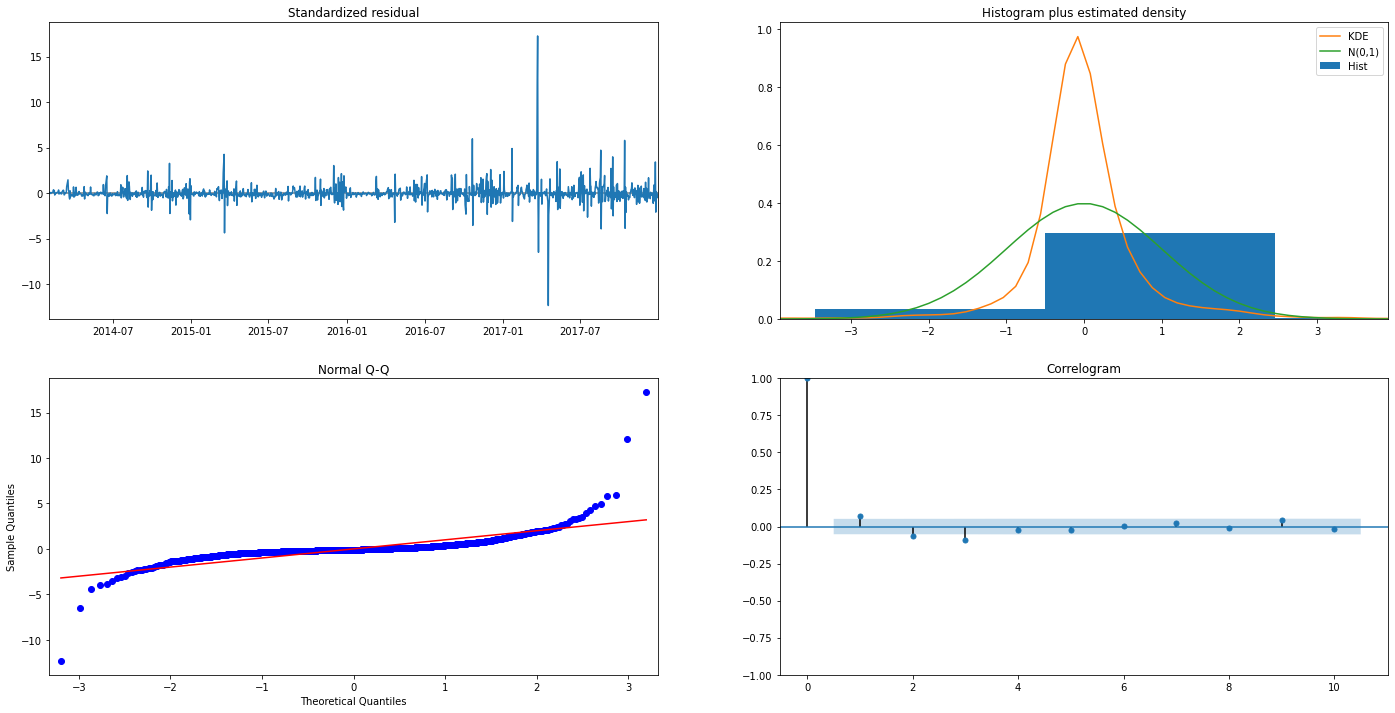

In [70]:
hasil.plot_diagnostics(figsize=(24, 12)) 
#Menghasilkan beberapa grafik: 
# 1. Residual terstandar dalam satuan waktu
# 2. Histogram dan perkiraan kepadatan dari residual terstandar/
# 3. Normal Q-Q, dengan garis referensi normal.
# 4. Korellogram
plt.show()

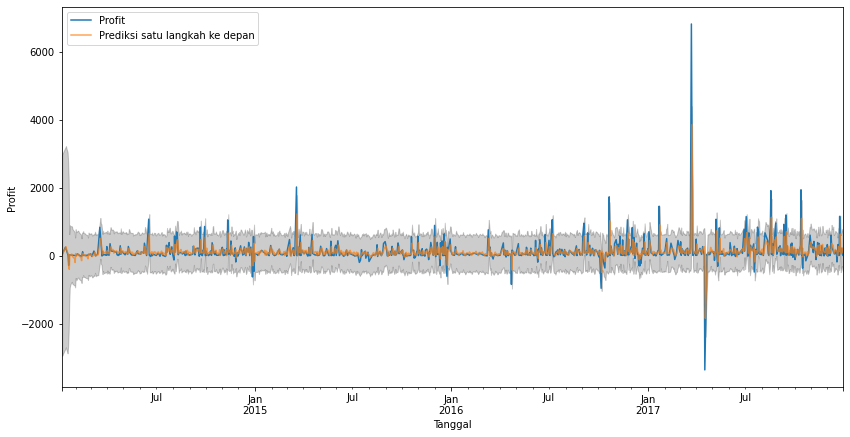

In [71]:
pred = hasil.get_prediction(start=dataset_profit.index[1], dynamic=False) # variabel untuk menunjukkan plot
pred_confidence = pred.conf_int()
ax = dataset_profit['2014':].plot(label='observed') # menunjukkan plot nilai original
pred.predicted_mean.plot(ax=ax, label='Prediksi satu langkah ke depan', alpha=.7, figsize=(14, 7)) # menunjukkan plot untuk nilai prediksi
ax.fill_between(pred_confidence.index,
                pred_confidence.iloc[:, 0],
                pred_confidence.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Profit')
plt.legend()
plt.show()


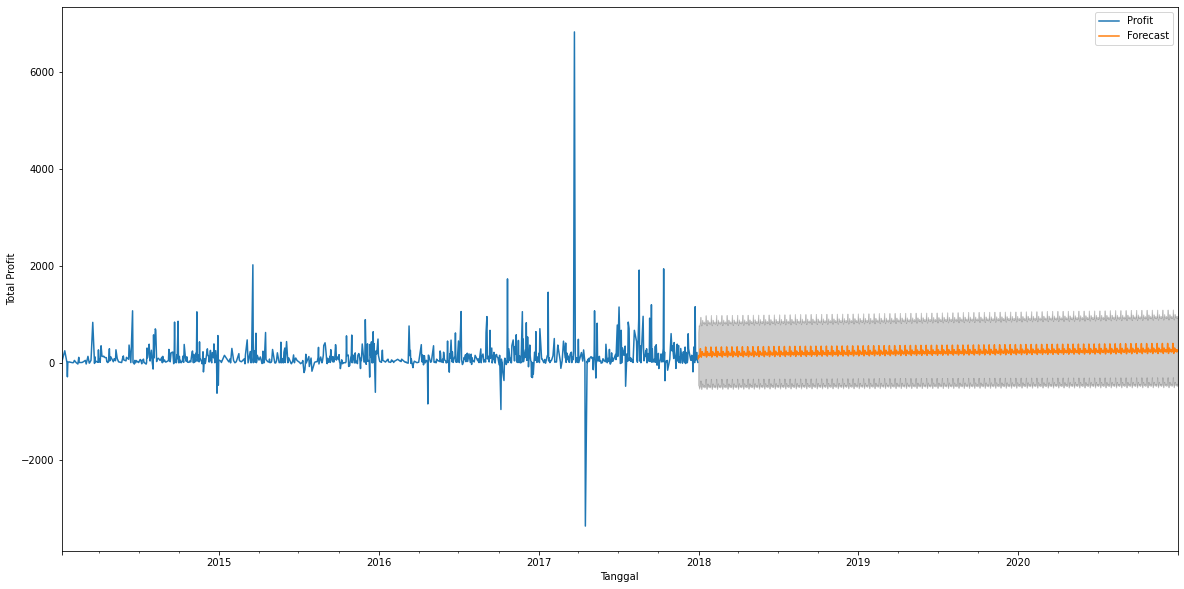

In [72]:
forecaset = hasil.get_forecast(steps = pd.to_datetime('2020-12-31'))
forecast_confidence = forecaset.conf_int()

ax = dataset_profit['2014':].plot(label='observed') # Menunjukkan plot nilai original
forecaset.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(forecast_confidence.index,
               forecast_confidence.iloc[:,0],
               forecast_confidence.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Tanggal')
ax.set_ylabel('Total Profit')
plt.legend()
plt.show()


In [73]:
model_3_predict = pred.predicted_mean
y_truth = dataset_profit['Profit']


mse_model_3 = mean_squared_error(model_3_predict, y_truth[1:])
rmse_model_3 = sqrt(mse_model_3)
print('RMSE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(rmse_model_3, 3))) # menampilkan akar mse sampai 3 desimal.
mae_model_3 = mean_absolute_error(model_3_predict, y_truth[1:])
print('MAE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(mae_model_3, 3))) # menampilkan mae sampai 3 desimal

RMSE dari hasil prediksi di dalam jangka yang diketahui adalah 277.354
MAE dari hasil prediksi di dalam jangka yang diketahui adalah 126.698


Model Keempat dengan Neural Prophet

In [74]:
pip install neuralprophet # Menginstall neural prophet untuk perbandingan keempat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 3.2 MB/s 
     |████████████████████████████████| 179 kB 18.4 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [75]:
from neuralprophet import NeuralProphet # Mengimpor neural prophet

In [76]:
dataset_prophet = west_region[['Order Date','Profit']] # Membuat dataset untuk neural prophet

In [77]:
dataset_prophet = dataset_prophet.sort_values('Order Date')
dataset_prophet = dataset_prophet.groupby('Order Date')['Profit'].sum().reset_index()

In [78]:
dataset_prophet.rename(columns = {'Order Date':'ds', 'Profit':'y'}, inplace = True)

In [79]:
dataset_prophet

,ds,y
0,2014-01-06,9.3312
1,2014-01-13,249.1494
2,2014-01-18,6.4864
3,2014-01-19,-287.9976
4,2014-01-20,15.0828
...,...,...
840,2017-12-24,1157.1246
841,2017-12-25,55.9278
842,2017-12-28,214.6857
843,2017-12-29,45.9582


In [80]:
dataset_prophet = dataset_prophet.set_index('ds')

In [81]:
# Data perlu diresample dan interpolate sehingga bisa digunakan pada neural prophet (tidak ada celah kosong)
dataset_prophet =  pd.DataFrame(dataset_prophet['y'].resample('D').mean()) #Data diresample dengan aturan D alias hari
dataset_prophet = dataset_prophet.interpolate(method='linear') #Fungsi interpolate() digunakan untuk melakukan interpolasi secara linear.

In [82]:
dataset_prophet = dataset_prophet.reset_index()

In [83]:
m = NeuralProphet()
metrics_prophet = m.fit(dataset_prophet)
predict_prophet = m.predict(dataset_prophet) # Melakukan prediksi di neural prophet

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.931% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 173


  0%|          | 0/129 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.54E-01, min: 3.46E-01


  0%|          | 0/129 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.54E-01, min: 1.75E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.33E-01
Epoch[173/173]: 100%|██████████| 173/173 [00:27<00:00,  6.25it/s, SmoothL1Loss=0.00327, MAE=147, RMSE=253, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.931% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.931% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


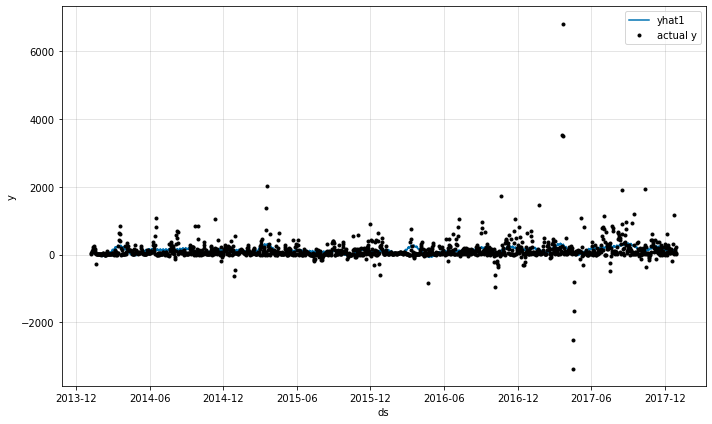

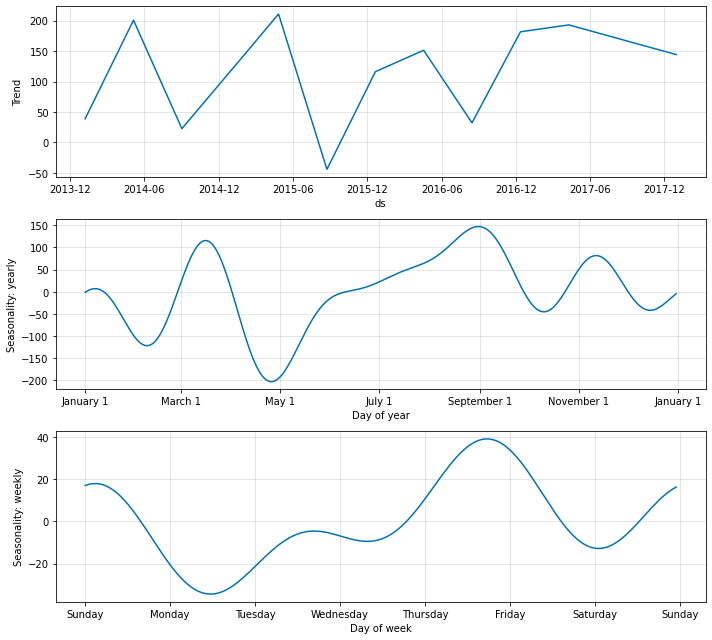

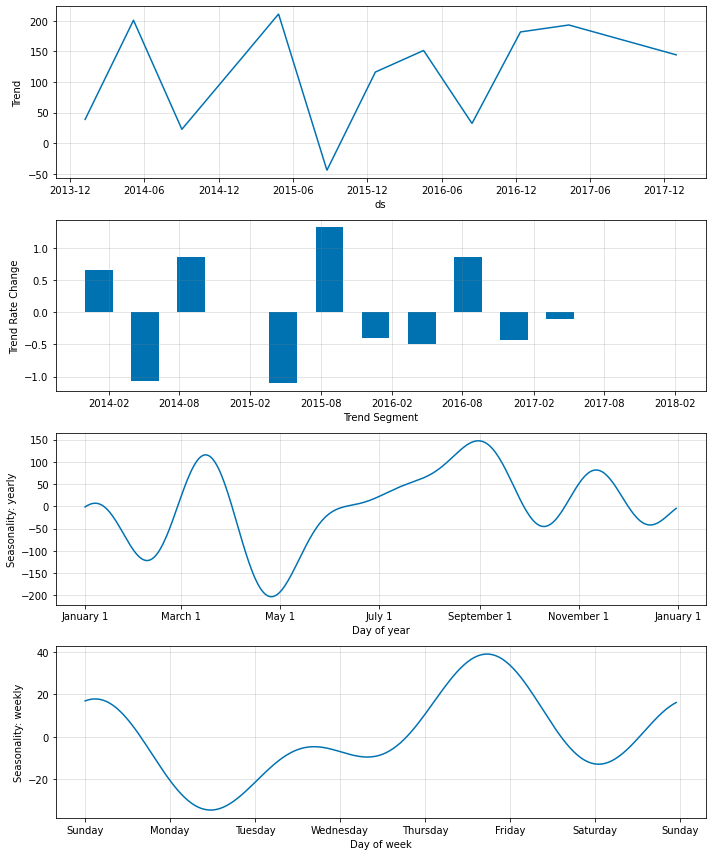

In [84]:
fig_predict_prophet = m.plot(predict_prophet)
fig_predict_prophet_components = m.plot_components(predict_prophet)
fig_predict_prophet_model = m.plot_parameters()

In [85]:
predict_prophet # Melihat nilai prediksi neural prophet

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2014-01-06,9.331200,24.663330,15.332130,38.811035,6.372966,-20.520559
1,2014-01-07,43.590943,25.643311,-17.947632,40.172852,6.823815,-21.353371
2,2014-01-08,77.850686,41.456055,-36.394631,41.534424,6.798005,-6.876418
3,2014-01-09,112.110429,59.786377,-52.324052,42.896240,6.276512,10.613701
4,2014-01-10,146.370171,83.351807,-63.018365,44.258057,5.245881,33.847878
...,...,...,...,...,...,...,...
1450,2017-12-26,108.847100,103.596680,-5.250420,145.025146,-20.075144,-21.353371
1451,2017-12-27,161.766400,121.096436,-40.669964,144.840576,-16.867912,-6.876418
1452,2017-12-28,214.685700,141.600342,-73.085358,144.656006,-13.669312,10.613701
1453,2017-12-29,45.958200,167.786865,121.828665,144.471436,-10.532516,33.847878


In [86]:
predict_prophet_ds = predict_prophet.set_index("ds") # Melakukan ramalan kedepan dengan neural prophet

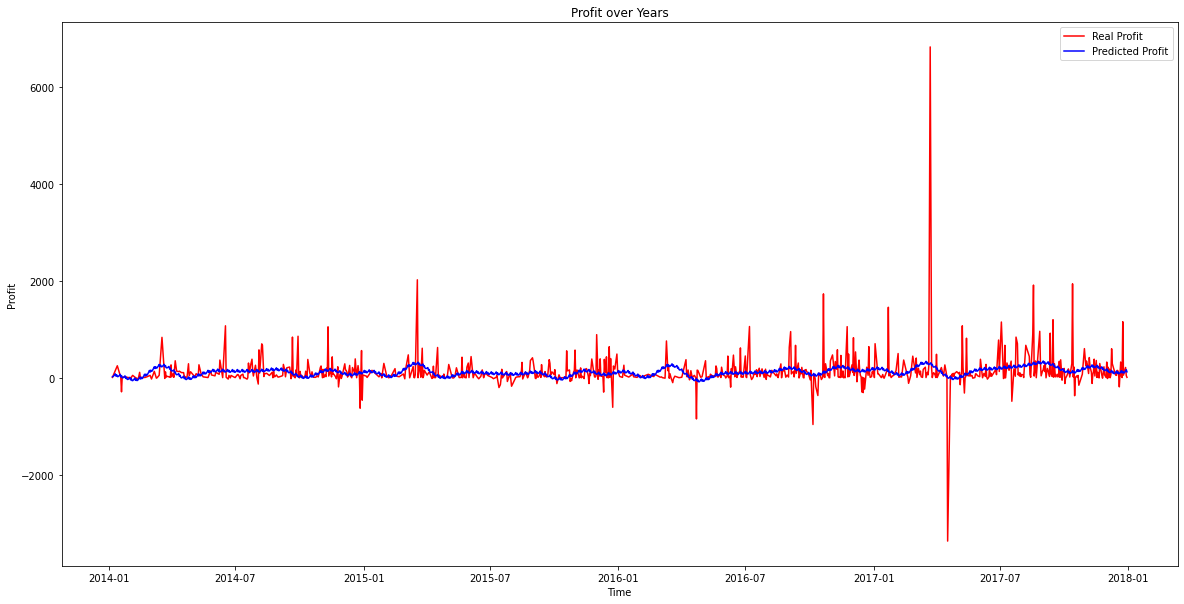

In [87]:
plt.plot(predict_prophet_ds["y"], color = 'red', label = 'Real Profit')
plt.plot(predict_prophet_ds["yhat1"], color = 'blue', label = 'Predicted Profit')
plt.title('Profit over Years')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [88]:
future_prophet = m.make_future_dataframe(df=dataset_prophet, periods=365)  # Membuat prediksi 365 hari ke depan dengan nerual_prophet
forecast_future_prophet = m.predict(df=future_prophet) # Membuat prediksi 365 hari ke depan dengan nerual_prophet

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.931% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


In [89]:
forecast_future_prophet_ds = forecast_future_prophet.set_index("ds") # Mengubah index dengan nilai tanggal agar bagus di plot

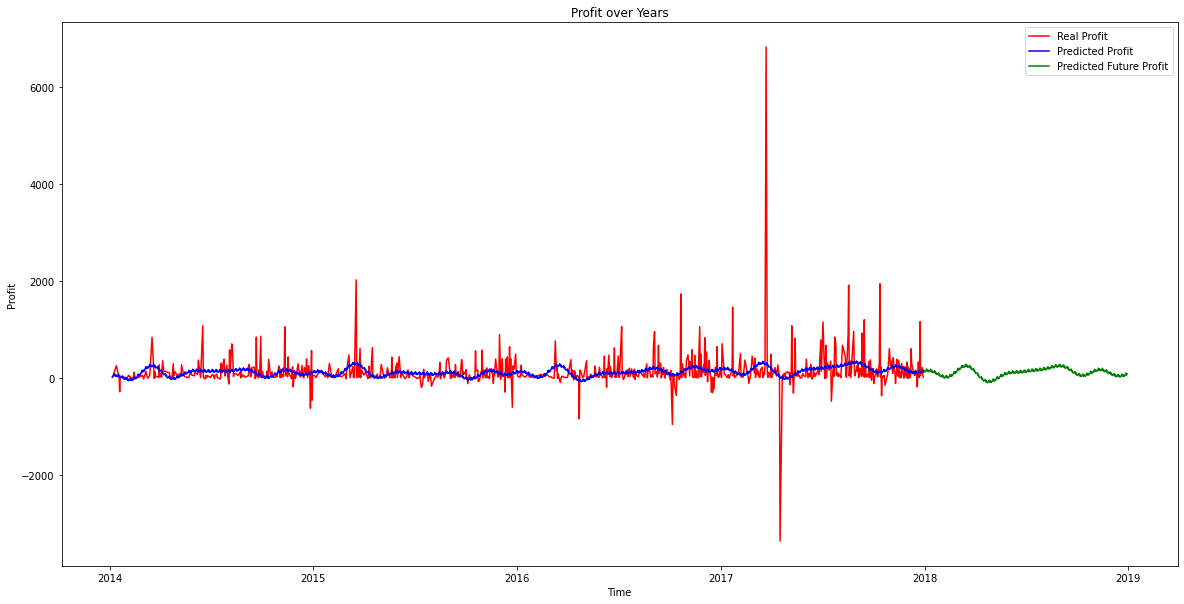

In [90]:
plt.plot(predict_prophet_ds["y"], color = 'red', label = 'Real Profit')
plt.plot(predict_prophet_ds["yhat1"], color = 'blue', label = 'Predicted Profit')
plt.plot(forecast_future_prophet_ds["yhat1"], color = 'green', label = 'Predicted Future Profit')
plt.title('Profit over Years')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.show()

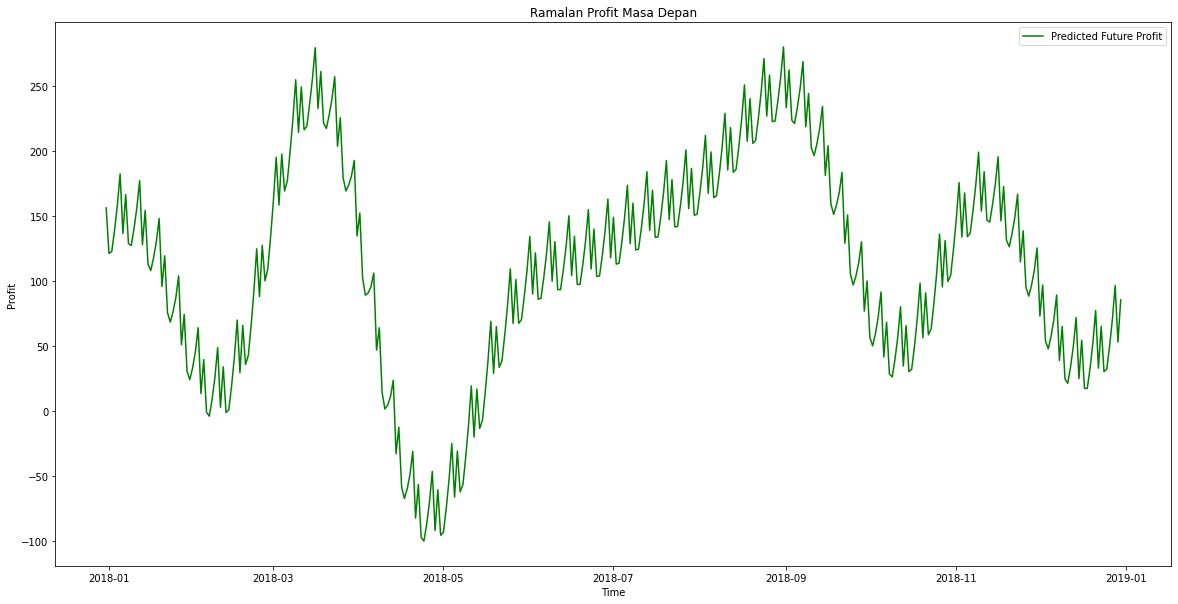

In [91]:
plt.plot(forecast_future_prophet_ds["yhat1"], color = 'green', label = 'Predicted Future Profit')
plt.title('Ramalan Profit Masa Depan')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [92]:
mse_model_4 = mean_squared_error(predict_prophet['yhat1'], predict_prophet['y'])
rmse_model_4 = sqrt(mse_model_4)
print('RMSE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(rmse_model_4, 3))) # Menampilkan nilai akar mse sampai tiga desimal
mae_model_4 = mean_absolute_error(predict_prophet['yhat1'], predict_prophet['y'])
print('MAE dari hasil prediksi di dalam jangka yang diketahui adalah {}'.format(round(mae_model_4, 3))) # Menampilkan nilai mae sampai tiga desimal

RMSE dari hasil prediksi di dalam jangka yang diketahui adalah 320.142
MAE dari hasil prediksi di dalam jangka yang diketahui adalah 147.159


Perbandingan

In [93]:
print('RMSE dari hasil prediksi model 1 (TF) bagian validasi {}'.format(round(rmse_model_1, 3))) # Menampilkan nilai akar mse sampai tiga desimal
print('RMSE dari hasil prediksi model 1 (TF) bagian penuh (terpotong jendela) {}'.format(round(rmse_model_1_all, 3))) # Menampilkan nilai akar mse sampai tiga desimal
print('RMSE dari hasil prediksi model 2 (TF) bagian validasi {}'.format(round(rmse_model_2, 3))) # Menampilkan nilai akar mse sampai tiga desimal
print('RMSE dari hasil prediksi model 2 (TF) bagian penuh (terpotong jendela) {}'.format(round(rmse_model_2_full, 3))) # Menampilkan nilai akar mse sampai tiga desimal
print('RMSE dari hasil prediksi model 3 (SARIMA) {}'.format(round(rmse_model_3, 3))) # Menampilkan nilai akar mse sampai tiga desimal
print('RMSE dari hasil prediksi model 4 (Neural Prophet) {}'.format(round(rmse_model_4, 3))) # Menampilkan nilai akar mse sampai tiga desimal

RMSE dari hasil prediksi model 1 (TF) bagian validasi 600.194
RMSE dari hasil prediksi model 1 (TF) bagian penuh (terpotong jendela) 307.219
RMSE dari hasil prediksi model 2 (TF) bagian validasi 316.96
RMSE dari hasil prediksi model 2 (TF) bagian penuh (terpotong jendela) 341.548
RMSE dari hasil prediksi model 3 (SARIMA) 277.354
RMSE dari hasil prediksi model 4 (Neural Prophet) 320.142


In [94]:
print('MAE dari hasil prediksi model 1 (TF) bagian validasi {}'.format(round(mae_model_1, 3))) # Menampilkan nilai akar mse sampai tiga desimal
print('MAE dari hasil prediksi model 1 (TF) bagian penuh (terpotong jendela) {}'.format(round(mae_model_1_all, 3))) # Menampilkan nilai akar mse sampai tiga desimal
print('MAE dari hasil prediksi model 2 (TF) bagian validasi {}'.format(round(mae_model_2, 3))) # Menampilkan nilai akar mse sampai tiga desimal
print('MAE dari hasil prediksi model 2 (TF) bagian penuh (terpotong jendela) {}'.format(round(mae_model_2_full, 3))) # Menampilkan nilai akar mse sampai tiga desimal
print('MAE dari hasil prediksi model 3 (SARIMA) {}'.format(round(mae_model_3, 3))) # Menampilkan nilai akar mse sampai tiga desimal
print('MAE dari hasil prediksi model 4 (Neural Prophet) {}'.format(round(mae_model_4, 3))) # Menampilkan nilai akar mse sampai tiga desimal

MAE dari hasil prediksi model 1 (TF) bagian validasi 222.319
MAE dari hasil prediksi model 1 (TF) bagian penuh (terpotong jendela) 107.26
MAE dari hasil prediksi model 2 (TF) bagian validasi 179.181
MAE dari hasil prediksi model 2 (TF) bagian penuh (terpotong jendela) 140.486
MAE dari hasil prediksi model 3 (SARIMA) 126.698
MAE dari hasil prediksi model 4 (Neural Prophet) 147.159
